In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка CSV
file_path = "stock_data_lb5.csv"
df = pd.read_csv(file_path, parse_dates=['date'])

# Создаем колонку с годом
df['year'] = df['date'].dt.year

df.head()

,date,company,open,high,low,close,volume,year
0,2020-11-19 22:13:11.218360,AAPL,188.57,191.73,187.14,189.78,3405915,2020
1,2020-11-20 22:13:11.218360,AAPL,192.69,194.00,190.69,191.62,7002713,2020
2,2020-11-21 22:13:11.218360,AAPL,195.79,198.27,194.96,196.30,12668393,2020
3,2020-11-22 22:13:11.218360,AAPL,200.00,201.26,198.47,198.79,9291662,2020
4,2020-11-23 22:13:11.218360,AAPL,203.18,203.43,201.88,202.45,2939593,2020


In [6]:
# Группировка по компании и году
result = df.groupby(['company', 'year']).agg(
    avg_close=('close', 'mean'),
    avg_volume=('volume', 'mean')
).reset_index()

result

,company,year,avg_close,avg_volume
0,AAPL,2020,211.075581,8.719264e+06
1,AAPL,2021,245.037836,7.564756e+06
2,AAPL,2022,306.210603,7.695494e+06
3,AAPL,2023,316.456493,7.500412e+06
4,AAPL,2024,403.468279,7.736035e+06
...,...,...,...,...
289,XOM,2021,263.067945,7.618110e+06
290,XOM,2022,203.571151,7.450148e+06
291,XOM,2023,388.654767,7.326581e+06
292,XOM,2024,521.225847,7.608364e+06


Средняя цена закрытия по компаниям

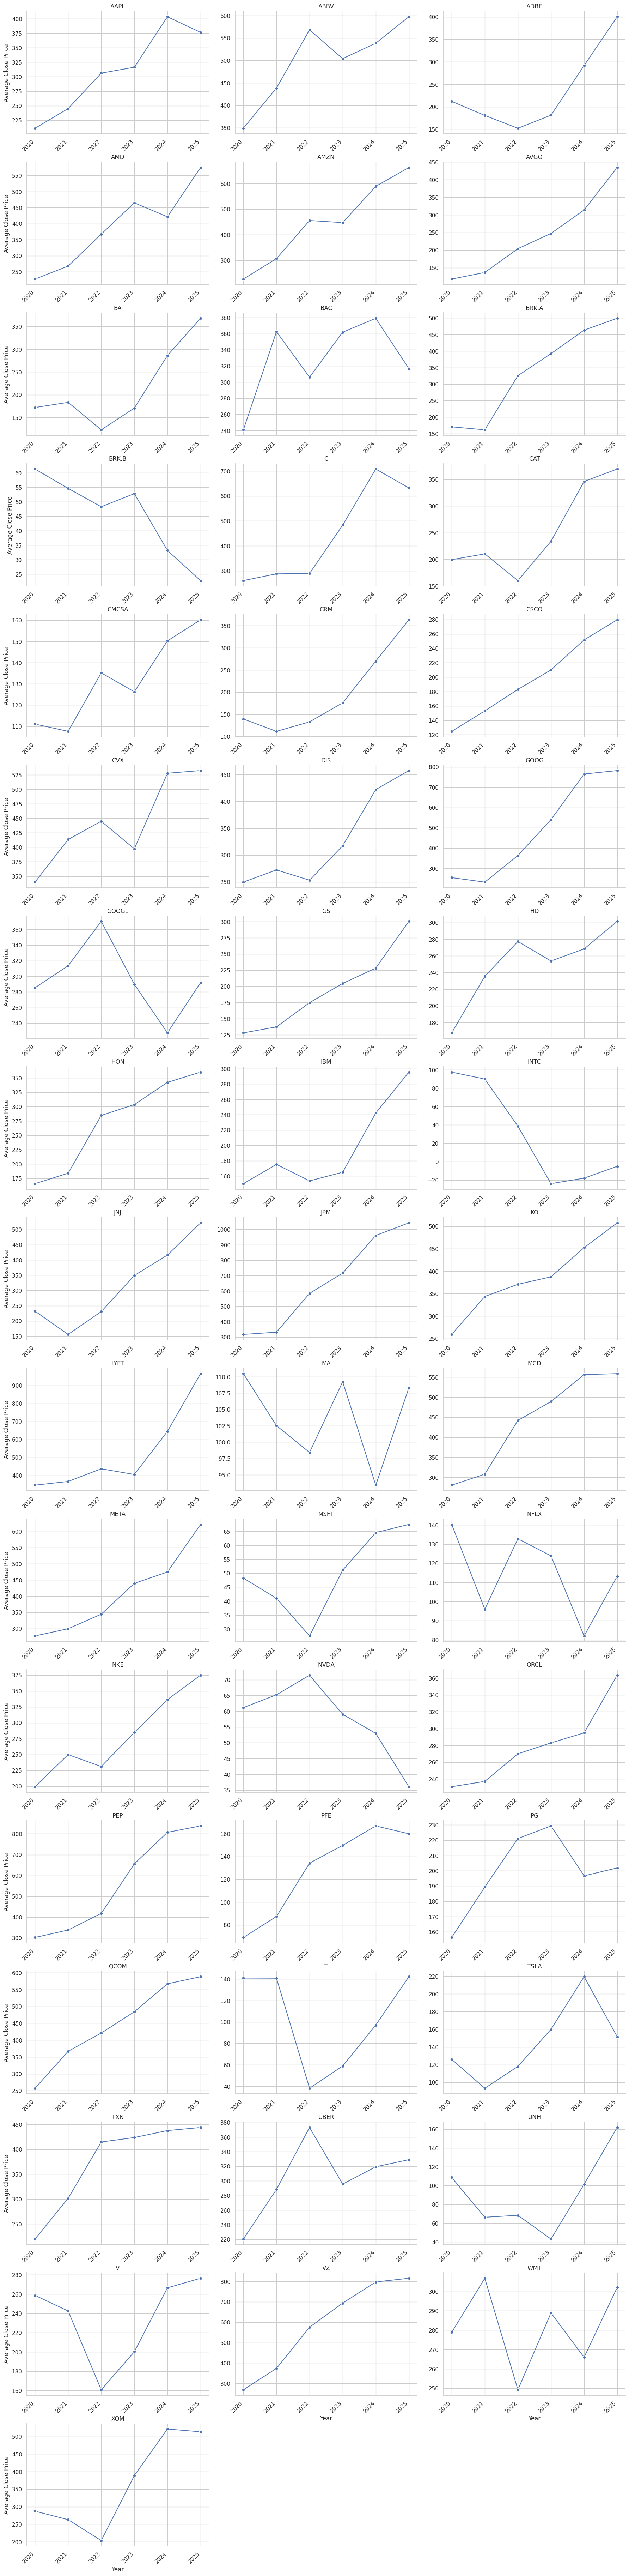

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# FacetGrid с sharex=False, чтобы подписи были на всех панелях
g = sns.FacetGrid(result, col="company", col_wrap=3, height=5, aspect=1.2, sharey=False, sharex=False)

# Рисуем линии
g.map_dataframe(sns.lineplot, x='year', y='avg_close', marker='o')

# Подписываем оси и заголовки
g.set_axis_labels("Year", "Average Close Price")
g.set_titles("{col_name}")

# Явно ставим подписи годов на каждой панели
years = sorted(result['year'].unique())
for ax in g.axes.flatten():
    ax.set_xticks(years)
    ax.set_xticklabels([str(y) for y in years], rotation=45, ha='right')

# Делаем отступы, чтобы подписи не обрезались
g.fig.tight_layout()
g.fig.subplots_adjust(bottom=0.15)

plt.show()